In [2]:
import os 
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_DIR = '/pool001/jschless/kiran-data/kiran-data/'
TURKEY_DIR = '/pool001/jschless/turkish_astroturfing'
FIG_DIR = '/home/jschless/paper_figs'

In [3]:
# load full panel from memory
top_50_panel_df = pd.read_pickle(os.path.join(DATA_DIR, 'full_panel_final.pkl'))
top_10_panel_df = pd.read_pickle(os.path.join(DATA_DIR, 'full_panel_top_10.pkl'))

### Plot Event Study

In [4]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})

In [10]:
def plot_event_study(df, cat: str='zero_exposure_tweets', quantiles=(.025,.975),
                    lower=-120, upper=120, title=None, include_errors=False,
                    adjust_time=None, label=None):
    
    if title is None:
        title = cat
    df = df.loc[(df.index>lower)&(df.index<upper)]
    median = df.groupby('time')[cat].median()
    mean = df.groupby('time')[cat].mean()
    p025 = df.groupby('time')[cat].quantile(quantiles[0])
    p975 = df.groupby('time')[cat].quantile(quantiles[1])
    
    if adjust_time:
        # adjusting 5 minutes for the 5 minute uncertainty window
        # adjust another 5 minutes for 5 minute binning window.
        mean.index = mean.index.map(lambda x: x+adjust_time)

    
    if include_errors:
        plt.errorbar(mean.index, mean, xerr=.5, yerr=[mean-p025, p975-mean],
                     fmt='o', capsize=10, label='mean')
    else:
        plt.scatter(mean.index, mean)
        plt.plot(mean.index, mean, label=label)

    plt.title('Unexposed New Tweets Event Study' )
    plt.xlabel('Time')
    plt.ylabel('Tweet Volume')

In [6]:
top_50_panel_df

,tweet,retweet,zero_exposure_tweets,absolute_time,trend,time,time_i,trending_start,threshold
created_at,,,,,,,,,
-5,10.0,NaN,4.0,2019-06-20 18:30:00,#1200ÜcretliAtamasıHaktır,-5,0,2019-06-20 18:35:00,0
0,44.0,NaN,6.0,2019-06-20 18:35:00,#1200ÜcretliAtamasıHaktır,0,1,2019-06-20 18:35:00,1
5,54.0,6.0,8.0,2019-06-20 18:40:00,#1200ÜcretliAtamasıHaktır,5,2,2019-06-20 18:35:00,1
10,62.0,2.0,6.0,2019-06-20 18:45:00,#1200ÜcretliAtamasıHaktır,10,3,2019-06-20 18:35:00,1
15,47.0,8.0,2.0,2019-06-20 18:50:00,#1200ÜcretliAtamasıHaktır,15,4,2019-06-20 18:35:00,1
...,...,...,...,...,...,...,...,...,...
42935,0.0,NaN,NaN,2019-08-14 13:25:00,#ŞehitlerVatanı,42935,8670,2019-07-15 17:50:00,1
42940,0.0,NaN,NaN,2019-08-14 13:30:00,#ŞehitlerVatanı,42940,8671,2019-07-15 17:50:00,1
42945,0.0,NaN,NaN,2019-08-14 13:35:00,#ŞehitlerVatanı,42945,8672,2019-07-15 17:50:00,1


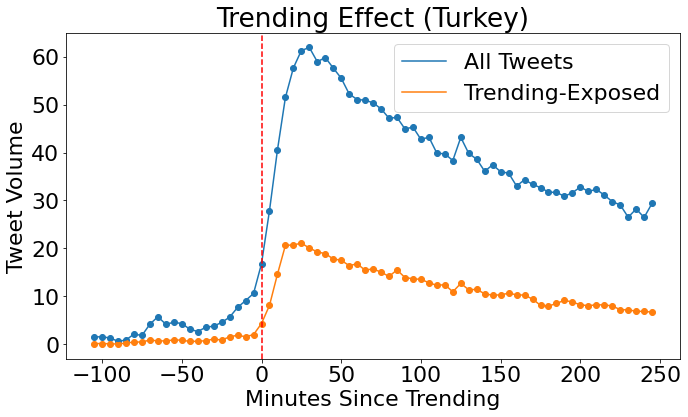

In [15]:
plt.figure(figsize=(11,6))

plot_event_study(top_50_panel_df.copy(), upper=240, cat="tweet", adjust_time=10, label="All Tweets")
plot_event_study(top_50_panel_df.copy(), upper=240, cat="zero_exposure_tweets", adjust_time=10, 
                 label="Trending-Exposed")
plt.title('Trending Effect (Turkey)')
plt.xlabel('Minutes Since Trending')
plt.axvline(x=0, c='r', ls='--')
plt.legend(loc='upper right')
plt.savefig(os.path.join(FIG_DIR, 'turkey_event_study.pdf'), bbox_inches="tight")

In [20]:
def plot_event_study_2(df,  ax, cat: str='zero_exposure_tweets', quantiles=(.025,.975),
                    lower=-120, upper=120, title=None, include_errors=False,
                    adjust_time=None, label=None, color='#1f77b4'):
    
    if title is None:
        title = cat
    df = df.loc[(df.index>lower)&(df.index<upper)]
    median = df.groupby('time')[cat].median()
    mean = df.groupby('time')[cat].mean()
    p025 = df.groupby('time')[cat].quantile(quantiles[0])
    p975 = df.groupby('time')[cat].quantile(quantiles[1])
    
    if adjust_time:
        # adjusting 5 minutes for the 5 minute uncertainty window
        # adjust another 5 minutes for 5 minute binning window.
        mean.index = mean.index.map(lambda x: x+adjust_time)

    
    if include_errors:
        plt.errorbar(mean.index, mean, xerr=.5, yerr=[mean-p025, p975-mean],
                     fmt='o', capsize=10, label='mean')
    else:
        ax.scatter(mean.index, mean, c=color)
        ax.plot(mean.index, mean, label=label, c=color)

#     plt.title('Unexposed New Tweets Event Study' )
#     plt.xlabel('Time')
#     plt.ylabel('Tweet Volume')

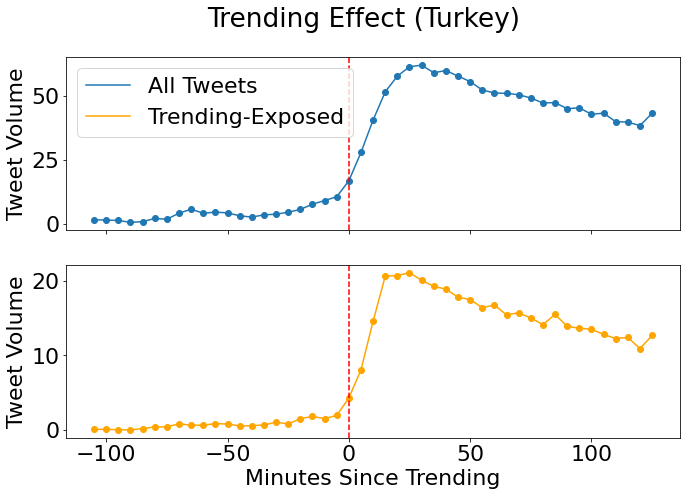

In [25]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
FIG_DIR = '/home/jschless/paper_figs'

fig, ax = plt.subplots(nrows=2, figsize=(11,7), sharex=True)

CAT = 'tweet'
# # plot_event_study(top_50_panel_df.loc[top_50_panel_df.index<0], cat='zero_exposure_regular', create_donut_hole=False)
plot_event_study_2(top_50_panel_df, ax[0], cat=CAT, adjust_time=10)

CAT = 'zero_exposure_tweets'
plot_event_study_2(top_50_panel_df, ax[1], cat=CAT, color='orange', adjust_time=10)

# # making a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#1f77b4', label='All Tweets'),
                   Line2D([0], [0], color='orange', label='Trending-Exposed')]

ax[0].legend(handles=legend_elements, loc='upper left')
ax[1].set_xlabel('Minutes Since Trending')
ax[0].set_ylabel("Tweet Volume")
ax[1].set_ylabel("Tweet Volume")
ax[0].axvline(x=0, c='r', ls='--')
ax[1].axvline(x=0, c='r', ls='--')
fig.suptitle('Trending Effect (Turkey)')
plt.savefig(os.path.join(FIG_DIR, 'turkey_event_study_2.pdf'), bbox_inches="tight")

Text(0.5, 0.98, 'Trending Effect (Turkey)')

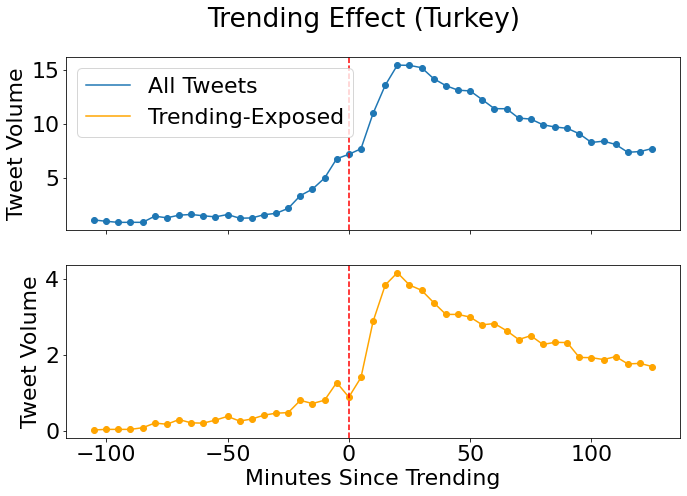

In [26]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
FIG_DIR = '/home/jschless/paper_figs'

fig, ax = plt.subplots(nrows=2, figsize=(11,7), sharex=True)

CAT = 'tweet'
# # plot_event_study(top_50_panel_df.loc[top_50_panel_df.index<0], cat='zero_exposure_regular', create_donut_hole=False)
plot_event_study_2(top_10_panel_df, ax[0], cat=CAT, adjust_time=10)

CAT = 'zero_exposure_tweets'
plot_event_study_2(top_10_panel_df, ax[1], cat=CAT, color='orange', adjust_time=10)

# # making a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#1f77b4', label='All Tweets'),
                   Line2D([0], [0], color='orange', label='Trending-Exposed')]

ax[0].legend(handles=legend_elements, loc='upper left')
ax[1].set_xlabel('Minutes Since Trending')
ax[0].set_ylabel("Tweet Volume")
ax[1].set_ylabel("Tweet Volume")
ax[0].axvline(x=0, c='r', ls='--')
ax[1].axvline(x=0, c='r', ls='--')
fig.suptitle('Trending Effect (Turkey)')


In [8]:
trend_sizes = top_10_panel_df.groupby('trend').sum().tweet

In [94]:
trend_sizes.sum()

1184310.0

Text(0, 0.5, 'Number of Hashtags')

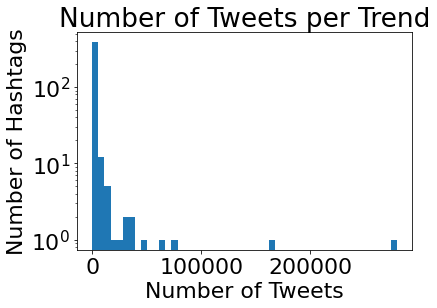

In [95]:
plt.hist(trend_sizes, log=True, bins=50)
plt.title('Number of Tweets per Trend')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Hashtags')

# Statistical Analysis

In [23]:
from statsmodels.formula.api import poisson
import numpy as np
import statsmodels.formula.api as smf

def run_models(panel_df, lower=.5, upper=.95, adjust_time=None):
    # returns model results and model names for a given panel
    # lower and upper are quantiles for size of trends to include

    l, u = trend_sizes.quantile([lower, upper])
    # only select trends between the lower and upper thresholds
    trends = trend_sizes.where(trend_sizes <= u).where(trend_sizes >= l).dropna().index  
    print(f'Selecting hashtags where number of tweets is in the interval: [{l}, {u}]')
    query = panel_df[panel_df.trend.isin(trends)].query('time >= -60 & time <= 60').fillna(0)
    query.trend = pd.Categorical(query.trend).codes
    query = query.dropna()

    formula_string = "zero_exposure_tweets ~ time*threshold"
    formula_string = "adj_tweet ~ time*threshold + exposed_tweets"
#    formula_string = "adj_tweet ~ time*threshold"

    if adjust_time:
        query['time'] = query.time.map(lambda x: x+adjust_time)
        query['threshold'] = query.time.map(lambda x: 1 if x >= 0 else 0)
    
    query['exposed_tweets'] = query['tweet'] - query['zero_exposure_tweets']
    query['adj_tweet'] = query.tweet+1
    query['ln_tweet'] = np.log(query.tweet + 1)
    query['ln_adj_tweet'] = np.log(query.tweet + 1)
    query['ln_zero_exposure_tweets'] = np.log(query.zero_exposure_tweets + 1)
 
    ols = smf.ols(formula_string, data=query).fit(
        cov_type='cluster', cov_kwds={'groups': query['trend']})


    re_ln = smf.mixedlm('ln_' + formula_string, data=query, groups=query['trend']).fit()#cov_type="HC3")
#         cov_type='cluster', cov_kwds={'groups': query['trend']})
    
    pois = poisson(formula_string, data=query).fit(cov_type='cluster', cov_kwds={'groups': query['trend']})
    formula_string += "+ C(trend)"
    pois_fe = poisson(formula_string, data=query).fit(cov_type='cluster', cov_kwds={'groups': query['trend']})

#     results = [re_ln, pois, pois_fe]
#     result_labels = ['Random Effects (logged outcome)', 'Poisson', 'Poisson w/ FE']
    results = [pois, pois_fe]
    result_labels = ['Poisson', 'Poisson w/ FE']
    return results, result_labels


In [24]:
results = [run_models(df, lower=0, upper=1, adjust_time=5) for df in [top_10_panel_df, top_50_panel_df]]

Selecting hashtags where number of tweets is in the interval: [1.0, 279123.0]
            tweet  retweet  zero_exposure_tweets       absolute_time  trend  \
created_at                                                                    
-5            8.0      0.0                   4.0 2019-06-20 18:30:00      0   
 0           41.0      0.0                   5.0 2019-06-20 18:35:00      0   
 5           46.0      3.0                   2.0 2019-06-20 18:40:00      0   
 10          58.0      1.0                   2.0 2019-06-20 18:45:00      0   
 15          46.0      4.0                   1.0 2019-06-20 18:50:00      0   
...           ...      ...                   ...                 ...    ...   
 40          12.0      0.0                   1.0 2019-07-15 19:35:00    400   
 45           9.0      0.0                   0.0 2019-07-15 19:40:00    400   
 50          17.0      1.0                   2.0 2019-07-15 19:45:00    400   
 55          13.0      0.0                   1.0 2019

In [25]:
def display_model_results(results, result_labels):
    # prints summary statistics and coefficient plot for a set of results
    for r, rl in zip(results, result_labels):
        print(rl, r.summary())
    var = 'threshold'
    coef_df = pd.DataFrame({'coef': [m.params[var] for m in results],
                            'err': [m.params[var] - m.conf_int().loc[var][0] for m in results],
                            'mod_name': result_labels
                           })
    
    return coef_df

In [26]:
coef_dfs = [display_model_results(res, mod_names) for res, mod_names in results]

Poisson                           Poisson Regression Results                          
Dep. Variable:              adj_tweet   No. Observations:                 6993
Model:                        Poisson   Df Residuals:                     6988
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                  0.5217
Time:                        08:49:18   Log-Likelihood:                -41077.
converged:                       True   LL-Null:                       -85876.
Covariance Type:              cluster   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9687      0.160     12.327      0.000       1.656       2.282
time               0.0243      0.005      4.493      0.000       0.014       0.035
threshold          0.2899   

Poisson                           Poisson Regression Results                          
Dep. Variable:              adj_tweet   No. Observations:                 7346
Model:                        Poisson   Df Residuals:                     7341
Method:                           MLE   Df Model:                            4
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                  0.5079
Time:                        08:49:18   Log-Likelihood:            -1.8462e+05
converged:                       True   LL-Null:                   -3.7515e+05
Covariance Type:              cluster   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8008      0.180     15.547      0.000       2.448       3.154
time               0.0309      0.007      4.221      0.000       0.017       0.045
threshold          0.9000   

In [28]:
# turns results into 
coef_dfs[0]['kind'] = 'turkey'
coef_dfs[0]['cat'] = 'top_10'
coef_dfs[1]['kind'] = 'turkey'
coef_dfs[1]['cat'] = 'top_50'
pd.concat(coef_dfs).reset_index().drop(columns='index').to_dict()

{'coef': {0: 0.2899103413143197,
  1: 0.25818542098906716,
  2: 0.8999942968420489,
  3: 0.8229172930609775},
 'err': {0: 0.27256638713060155,
  1: 0.25478302801855796,
  2: 0.3080268901042966,
  3: 0.2786812993380047},
 'mod_name': {0: 'Poisson',
  1: 'Poisson w/ FE',
  2: 'Poisson',
  3: 'Poisson w/ FE'},
 'kind': {0: 'turkey', 1: 'turkey', 2: 'turkey', 3: 'turkey'},
 'cat': {0: 'top_10', 1: 'top_10', 2: 'top_50', 3: 'top_50'}}

In [29]:
import math
def plot_coefficients(coef_dfs, names=['Top 10', 'Top 50'], raw=True,
                     title="Return to Trending Estimates (Turkey)"):
    # raw: if true, show actual coefficients. if false convert to % increase
    fig, ax = plt.subplots(figsize=(8, 5))
    

    n_trials = len(coef_dfs)
    n_models = len(coef_dfs[0])
    xtick_locs = [x + (n_models-1)*.1/2 for x in range(len(coef_dfs[0]))]
    
    for i, coef, name in zip(range(n_models), coef_dfs, names):
        coef_df = coef.copy()
        coef_df['x'] = range(len(coef_df)) 
        coef_df.x += .1*i
        if not raw:
            coef_df['coef'] = coef_df['coef'].apply(lambda x: (math.exp(x) * 100) - 100)
            coef_df['err'] = coef_df['err'].apply(lambda x: (math.exp(x) * 100) - 100)
        plt.errorbar(coef_df['x'], coef_df['coef'], yerr=coef_df['err'],
                    label=name, fmt='o')
        
    
    plt.legend(title="Trending Threshold", loc=4)
    ax.set_ylabel('')
    ax.set_xlabel('')
    # ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.set_title('Return to Trending Estimates')
    print(xtick_locs, n_models)
    ax.xaxis.set_ticks(xtick_locs)
    ax.xaxis.set_ticklabels(coef_df['mod_name'].tolist())
    ax.xaxis.set_label_text('Model Type')
    if raw:
        ax.yaxis.set_label_text('Coefficient Value')
    else:
        ax.yaxis.set_label_text('% Increase in Tweet Volume')
        
    return fig, ax

[0.05, 1.05] 2


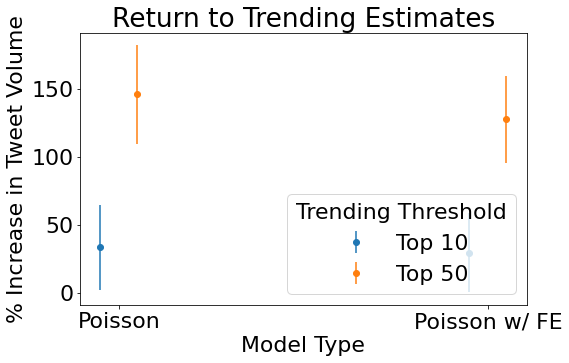

In [30]:
fig, ax = plot_coefficients(coef_dfs.copy(), raw=False)

In [17]:
fig.savefig(os.path.join(DATA_DIR, 'turkey_effect_sizes.pdf'))
os.path.join(DATA_DIR, 'turkey_effect_sizes.pdf')

'/pool001/jschless/kiran-data/kiran-data/turkey_effect_sizes.pdf'

## Regression Table

In [32]:
from stargazer.stargazer import Stargazer

In [33]:
models = results[0][0] + results[1][0]
tab = Stargazer(models)
tab.covariate_order(['Intercept', 'exposed_tweets', 'threshold', 'time', 'time:threshold'])
tab.rename_covariates({'exposed_tweets': 'Exposed Tweets', 'time': 'Time', 
                       'time:threshold': 'Time * Trending', 'threshold': 'Trending'})
tab.title('Turkish Trending Effect Models')
tab.add_line('Fixed Effects', ['No', 'Yes', 'No', 'Yes'])
tab.custom_columns(['Top 10', 'Top 10', 'Top 50', 'Top 50'], [1, 1, 1, 1])
tab.show_model_numbers(False)
tab.add_custom_notes(['Standard errors clustered at hashtag level'])


# work around to get pseudo r2

for tm, m in zip(tab.model_data, models):
    tm['r2'] = m._results.prsquared
#tab.model_data['r2'] =  [m._results.prsquared for m in models]
tab.show_r2=True
tab.show_adj_r2=False

tab.show_residual_std_err=False
tab.show_f_statistic=False
tab.dependent_variable="Tweet Volume"
with open(os.path.join(FIG_DIR, 'turkey_regression_table.tex'), 'w') as f:
    print(tab.render_latex(), file=f)
print(tab.render_latex())
tab

\begin{table}[!htbp] \centering
  \caption{Turkish Trending Effect Models}
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Dependent variable:}} \
\cr \cline{4-5}
\\[-1.8ex] & \multicolumn{1}{c}{Top 10} & \multicolumn{1}{c}{Top 10} & \multicolumn{1}{c}{Top 50} & \multicolumn{1}{c}{Top 50}  \\
\hline \\[-1.8ex]
 Intercept & 1.969$^{***}$ & 2.611$^{***}$ & 2.801$^{***}$ & 2.778$^{***}$ \\
  & (0.160) & (0.216) & (0.180) & (0.153) \\
 Exposed Tweets & 0.021$^{***}$ & 0.021$^{***}$ & 0.003$^{***}$ & 0.003$^{***}$ \\
  & (0.002) & (0.003) & (0.000) & (0.001) \\
 Trending & 0.290$^{**}$ & 0.258$^{**}$ & 0.900$^{***}$ & 0.823$^{***}$ \\
  & (0.139) & (0.130) & (0.157) & (0.142) \\
 Time & 0.024$^{***}$ & 0.019$^{***}$ & 0.031$^{***}$ & 0.027$^{***}$ \\
  & (0.005) & (0.005) & (0.007) & (0.007) \\
 Time * Trending & -0.026$^{***}$ & -0.020$^{***}$ & -0.031$^{***}$ & -0.027$^{***}$ \\
  & (0.005) & (0.005) & (0.008) & (0.007) \\
 Fixed 